In [1]:
# Dependencies
import random
import timeit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from citipy import citipy
import requests
from datetime import datetime
# API source
from config import weather_api_key

In [2]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [3]:
for coordinate in coordinates:
    print(coordinate[0],coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [4]:
# Add the latitudes and longitudes to a list.
#lat_lngs = zip(*lat_lngs)
#coordinates = list(lat_lngs)
lats = np.random.uniform(-90,90,size=1500)
lngs = np.random.uniform(-180,180,size=1500)
lat_lngs = zip(lats,lngs)

for lat_lng in lat_lngs:
    print(lat_lng[0],lat_lng[1])
    break

-65.80032467417428 52.145206696449236


In [5]:
# Create list for holding the cities
cities = []

# Identify the nearest city for each lat and long combo
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0],lat_lng[1]).city_name
    
    # Filter out dupes
    if city not in cities:
        cities.append(city)
# confirmation
print(len(cities))

609


In [6]:
# URL for Weahter Map API Call

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c777755f1537ae28f437f017b5d96844


In [7]:
query_url = url + "appid" + weather_api_key

In [8]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c777755f1537ae28f437f017b5d96844&q=Boston


In [9]:
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02d'}],
 'base': 'stations',
 'main': {'temp': 81.86,
  'feels_like': 79.63,
  'temp_min': 78.8,
  'temp_max': 84,
  'pressure': 1006,
  'humidity': 61},
 'visibility': 16093,
 'wind': {'speed': 14.99, 'deg': 200},
 'clouds': {'all': 20},
 'dt': 1592954068,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1592903286,
  'sunset': 1592958295},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [10]:
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [11]:
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
if city_weather.json():
    print(f"City Weather found.")
else:
    print(f"City weather not found.")
    
boston_data = city_weather.json()

City Weather found.


In [12]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02d'}],
 'base': 'stations',
 'main': {'temp': 81.86,
  'feels_like': 79.63,
  'temp_min': 78.8,
  'temp_max': 84,
  'pressure': 1006,
  'humidity': 61},
 'visibility': 16093,
 'wind': {'speed': 14.99, 'deg': 200},
 'clouds': {'all': 20},
 'dt': 1592954068,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1592903286,
  'sunset': 1592958295},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [13]:
# Get the JSON data.
boston_data = city_weather.json()
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.36 -71.06 84 61 20 14.99


In [14]:
# Import the datetime module from the datetime library.
from datetime import datetime

# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2020-06-23 23:14:28'

In [15]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [16]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        
        

Processing Record 1 of Set 1 | iqaluit
Processing Record 2 of Set 1 | manicore
Processing Record 3 of Set 1 | nikolskoye
Processing Record 4 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 5 of Set 1 | avera
Processing Record 6 of Set 1 | krasnoselkup
Processing Record 7 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 8 of Set 1 | carnarvon
Processing Record 9 of Set 1 | cherskiy
Processing Record 10 of Set 1 | russell
Processing Record 11 of Set 1 | port alfred
Processing Record 12 of Set 1 | marzuq
Processing Record 13 of Set 1 | kruisfontein
Processing Record 14 of Set 1 | dikson
Processing Record 15 of Set 1 | hobart
Processing Record 16 of Set 1 | krasnaya gorka
Processing Record 17 of Set 1 | high level
Processing Record 18 of Set 1 | grootfontein
Processing Record 19 of Set 1 | brighton
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | barrow
Processing Record 22 of Set 1 | albany
Processing Record 23 of Set 1 | baren

Processing Record 43 of Set 4 | blagoyevo
Processing Record 44 of Set 4 | georgetown
Processing Record 45 of Set 4 | mahebourg
Processing Record 46 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 47 of Set 4 | kieta
Processing Record 48 of Set 4 | tartagal
Processing Record 49 of Set 4 | muravlenko
Processing Record 50 of Set 4 | vanavara
Processing Record 1 of Set 5 | zhigalovo
Processing Record 2 of Set 5 | lolua
City not found. Skipping...
Processing Record 3 of Set 5 | mangrol
Processing Record 4 of Set 5 | camacha
Processing Record 5 of Set 5 | luderitz
Processing Record 6 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 7 of Set 5 | yazoo city
Processing Record 8 of Set 5 | minab
Processing Record 9 of Set 5 | warwick
Processing Record 10 of Set 5 | faanui
Processing Record 11 of Set 5 | port blair
Processing Record 12 of Set 5 | adrar
Processing Record 13 of Set 5 | ancud
Processing Record 14 of Set 5 | siddhapur
Processing Record 15 of Set 

Processing Record 29 of Set 8 | kaabong
Processing Record 30 of Set 8 | manokwari
Processing Record 31 of Set 8 | bajina basta
Processing Record 32 of Set 8 | sahbuz
Processing Record 33 of Set 8 | ruatoria
City not found. Skipping...
Processing Record 34 of Set 8 | loa janan
Processing Record 35 of Set 8 | victoria
Processing Record 36 of Set 8 | hoi an
Processing Record 37 of Set 8 | kahului
Processing Record 38 of Set 8 | jabiru
City not found. Skipping...
Processing Record 39 of Set 8 | monterey
Processing Record 40 of Set 8 | armacao dos buzios
City not found. Skipping...
Processing Record 41 of Set 8 | riyaq
City not found. Skipping...
Processing Record 42 of Set 8 | axim
Processing Record 43 of Set 8 | mandalgovi
Processing Record 44 of Set 8 | lazaro cardenas
Processing Record 45 of Set 8 | kutum
Processing Record 46 of Set 8 | barbar
City not found. Skipping...
Processing Record 47 of Set 8 | port macquarie
Processing Record 48 of Set 8 | micheweni
Processing Record 49 of Set 

Processing Record 18 of Set 12 | nizhniy odes
Processing Record 19 of Set 12 | toliary
City not found. Skipping...
Processing Record 20 of Set 12 | bodden town
Processing Record 21 of Set 12 | rehoboth
Processing Record 22 of Set 12 | shaowu
Processing Record 23 of Set 12 | sri aman
Processing Record 24 of Set 12 | zuidhorn
Processing Record 25 of Set 12 | nome
Processing Record 26 of Set 12 | gobabis
Processing Record 27 of Set 12 | tarakan
Processing Record 28 of Set 12 | hirado
Processing Record 29 of Set 12 | aldan
Processing Record 30 of Set 12 | khandyga
Processing Record 31 of Set 12 | sokoni
Processing Record 32 of Set 12 | guarapari
Processing Record 33 of Set 12 | west bay
Processing Record 34 of Set 12 | bundaberg
Processing Record 35 of Set 12 | lexington
Processing Record 36 of Set 12 | alihe
Processing Record 37 of Set 12 | porto belo
Processing Record 38 of Set 12 | wanning
Processing Record 39 of Set 12 | braco do norte
Processing Record 40 of Set 12 | kaeo
Processing R

In [17]:
len(city_data)

557

In [18]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Iqaluit,63.75,-68.51,44.01,87,90,16.11,CA,2020-06-23 23:18:51
1,Manicore,-5.81,-61.30,82.40,83,59,1.12,BR,2020-06-23 23:18:51
2,Nikolskoye,59.70,30.79,59.00,72,0,4.47,RU,2020-06-23 23:18:51
3,Avera,33.19,-82.53,77.00,83,75,18.34,US,2020-06-23 23:18:52
4,Krasnoselkup,65.70,82.47,56.43,61,0,3.67,RU,2020-06-23 23:18:52


In [21]:
# Create the output file (CSV).
output_data_file = "images/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
# Compile fields for dataframe to plot
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [23]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1592954459.4821503

# WeatherPy Charts

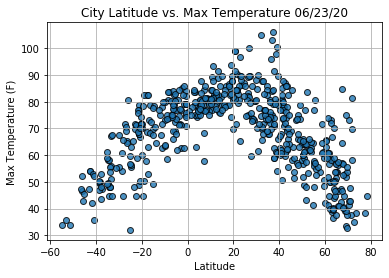

In [25]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("images/Fig1.png")

# Show plot.
plt.show()

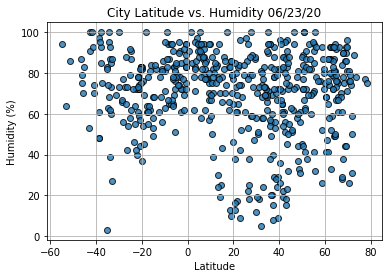

In [26]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("images/Fig2.png")
# Show plot.
plt.show()

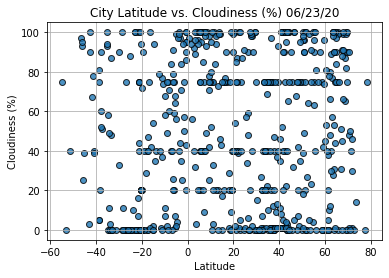

In [27]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("images/Fig3.png")
# Show plot.
plt.show()

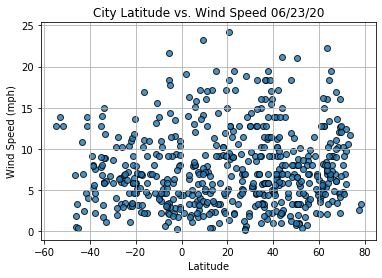

In [28]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("images/Fig4.png")
# Show plot.
plt.show()

# Linear Regression with SciPy

In [29]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [30]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [31]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [32]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

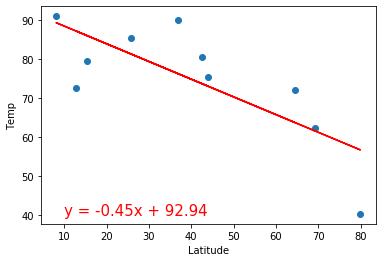

In [33]:
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [34]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [35]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

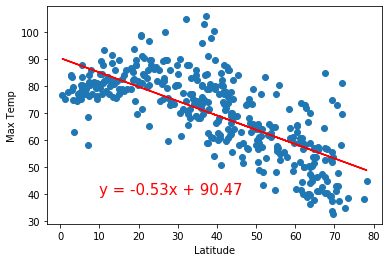

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

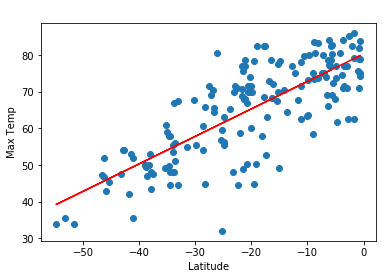

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

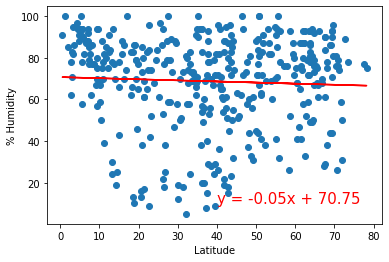

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

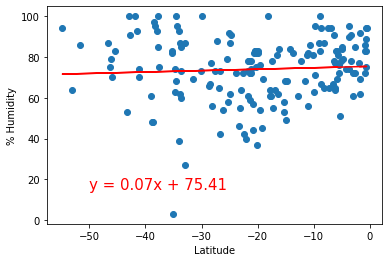

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

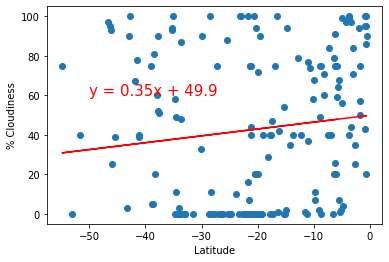

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

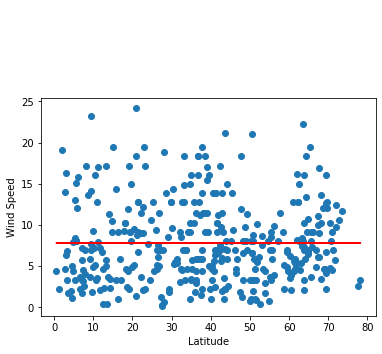

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

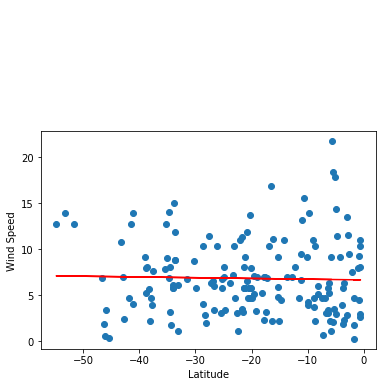

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))

# GMaps Visualization with API

In [43]:
# Import the dependencies.
import pandas as pd
import gmaps
import requests
# Import the API key.
from config import g_key

In [45]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("images/cities.csv")
city_data_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,Iqaluit,63.75,-68.51,44.01,87,90,16.11,CA,2020-06-23 23:18:51
1,1,Manicore,-5.81,-61.30,82.40,83,59,1.12,BR,2020-06-23 23:18:51
2,2,Nikolskoye,59.70,30.79,59.00,72,0,4.47,RU,2020-06-23 23:18:51
3,3,Avera,33.19,-82.53,77.00,83,75,18.34,US,2020-06-23 23:18:52
4,4,Krasnoselkup,65.70,82.47,56.43,61,0,3.67,RU,2020-06-23 23:18:52


In [46]:
# Configure gmaps to use your Google API key.
gmaps.configure(api_key=g_key)

In [47]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
# Assign the figure variable.
fig = gmaps.figure()
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp)
# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [48]:
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp)
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
temps = []
for temp in max_temp:
    temps.append(max(temp, 0))

In [49]:
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.0)

In [50]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [51]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

What is the minimum temperature you would like for your trip? 75
What is the maximum temperature you would like for your trip? 90


In [52]:
# Filter the dataset to find the cities that fit the criteria.
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & \
                                       (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.head(10)

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,1,Manicore,-5.81,-61.30,82.40,83,59,1.12,BR,2020-06-23 23:18:51
3,3,Avera,33.19,-82.53,77.00,83,75,18.34,US,2020-06-23 23:18:52
7,7,Russell,32.35,-85.20,87.80,58,20,8.59,US,2020-06-23 23:18:52
9,9,Marzuq,14.40,46.47,81.88,25,43,2.30,YE,2020-06-23 23:18:52
19,19,Albany,42.60,-73.97,87.01,51,40,5.68,US,2020-06-23 23:18:53
20,20,Scottsbluff,41.87,-103.67,87.80,22,1,6.60,US,2020-06-23 23:18:53
21,21,Acapulco,16.86,-99.89,86.00,74,90,5.82,MX,2020-06-23 23:15:26
26,26,Avarua,-21.21,-159.78,78.80,74,44,9.17,CK,2020-06-23 23:18:54
32,32,Joura,26.34,77.81,89.31,53,59,5.12,IN,2020-06-23 23:18:55
36,36,Kapaa,22.08,-159.32,82.99,65,40,11.41,US,2020-06-23 23:18:56


In [53]:
preferred_cities_df.count()

City_ID       211
City          211
Lat           211
Lng           211
Max Temp      211
Humidity      211
Cloudiness    211
Wind Speed    211
Country       211
Date          211
dtype: int64

In [54]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head()

,City,Country,Max Temp,Lat,Lng,Hotel Name
1,Manicore,BR,82.40,-5.81,-61.30,
3,Avera,US,77.00,33.19,-82.53,
7,Russell,US,87.80,32.35,-85.20,
9,Marzuq,YE,81.88,14.40,46.47,
19,Albany,US,87.01,42.60,-73.97,


In [55]:
# Set parameters to search for a hotel.
params = {
    "radius": 5000,
    "type": "lodging",
    "key": g_key
}

In [56]:
# Dependencies and Setup
import requests
import gmaps

In [57]:
# Set the parameters to search for a hotel in Paris.
params = {
    "radius": 5000,
    "types": "lodging",
    "key": g_key,
    "location": "48.8566, 2.3522"}
# Use base URL to search for hotels in Paris.
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
# Make request and get the JSON data from the search.
hotels = requests.get(base_url, params=params).json()

In [58]:
# Iterate through the DataFrame.
for index, row in hotel_df.iterrows():
    # Get the latitude and longitude.
    lat = row["Lat"]
    lng = row["Lng"]

    # Add the latitude and longitude to location key for the params dictionary.
    params["location"] = f"{lat},{lng}"

    # Use the search term: "lodging" and our latitude and longitude.
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    # Make request and get the JSON data from the search.
    hotels = requests.get(base_url, params=params).json()
    # Grab the first hotel from the results and store the name.
    try:
        hotel_df.loc[index, "Hotel Name"] = hotels["results"][0]["name"]
    except (IndexError):
        print("Hotel not found... skipping.")

Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.


In [59]:
# Add a heatmap of temperature for the vacation spots.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp, dissipating=False,
             max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [60]:
# Add a heatmap of temperature for the vacation spots and marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp, 
             dissipating=False, max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [61]:
info_box_template = """
<dl>
<dt>Hotel Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
<dt>Max Temp</dt><dd>{Max Temp} °F</dd>
</dl>
"""
# Store the DataFrame Row.
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]

In [62]:
# Add a heatmap of temperature for the vacation spots and a pop-up marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,dissipating=False,
             max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations, info_box_content=hotel_info)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

# Challenge Part 1

In [69]:
from citipy import citipy
import numpy as np
import pandas as pd

In [86]:
# Create random locations by Latitude and longitude
lats = np.random.uniform(low=-90.000,high=90.000,size=1500)
lngs = np.random.uniform(low=-180.000,high=180,size=1500)
lat_lngs = zip(lats,lngs)

In [87]:
# Add the lat and long to a list 
coordinates2 = list(lat_lngs)

In [109]:
# Create list for cities
cities = []

# Identify nearest city for each lat/lng combo
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # if the city the unique then add it to cities list
    if city not in cities:
        cities.append(city)
len(cities)

623

In [110]:
import requests
from datetime import datetime
from config import weather_api_key

In [111]:
# URL for Weahter Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c777755f1537ae28f437f017b5d96844


In [146]:
# list of city data
city_data = []
# Print to log
print("Beginnning Data Retrieval")
print("--------------------------")

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1    
    
    try:
        city_weather = requests.get(city_url).json()
        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]        
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        city_weather_description = city_weather["weather"][0]["description"]
        try:
            city_rain_inches = city_weather["rain"]["1h"]
        except KeyError:
            city_rain_inches = 0
        try:
            city_snow_inches = city_weather["snow"]["1h"]
        except KeyError:
            city_snow_inches = 0
            
        # Append the city info into city_data
        city_data.append(
        {
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Current Description": city_weather_description,
            "Rain (inches)": city_rain_inches,
            "Snow (inches)": city_snow_inches,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country" : city_country
        })
    except:
        print("City not found. Skipping...")
        # TEST==========================
        pass
# Indicate that the Data Loading is complete
print("-----------------------")
print("Data Retrieval Complete")
print("-----------------------")

Beginnning Data Retrieval
--------------------------
Processing Record 24 of Set 133 | ilebo
Processing Record 25 of Set 133 | makakilo city
Processing Record 26 of Set 133 | calvinia
Processing Record 27 of Set 133 | hobart
Processing Record 28 of Set 133 | dikson
Processing Record 29 of Set 133 | viedma
Processing Record 30 of Set 133 | cap malheureux
Processing Record 31 of Set 133 | boulsa
Processing Record 32 of Set 133 | taolanaro
City not found. Skipping...
Processing Record 33 of Set 133 | launceston
Processing Record 34 of Set 133 | kautokeino
Processing Record 35 of Set 133 | norman wells
Processing Record 36 of Set 133 | ati
Processing Record 37 of Set 133 | sentyabrskiy
City not found. Skipping...
Processing Record 38 of Set 133 | nikolskoye
Processing Record 39 of Set 133 | atherton
Processing Record 40 of Set 133 | hilo
Processing Record 41 of Set 133 | mataura
Processing Record 42 of Set 133 | mar del plata
Processing Record 43 of Set 133 | bluff
Processing Record 44 of 

Processing Record 30 of Set 136 | irituia
Processing Record 31 of Set 136 | soure
Processing Record 32 of Set 136 | fontenay-le-comte
Processing Record 33 of Set 136 | san patricio
Processing Record 34 of Set 136 | wagar
Processing Record 35 of Set 136 | barinas
Processing Record 36 of Set 136 | grand river south east
City not found. Skipping...
Processing Record 37 of Set 136 | codrington
Processing Record 38 of Set 136 | luena
Processing Record 39 of Set 136 | sjenica
Processing Record 40 of Set 136 | villa carlos paz
Processing Record 41 of Set 136 | marquette
Processing Record 42 of Set 136 | bayangol
Processing Record 43 of Set 136 | pevek
Processing Record 44 of Set 136 | angoram
Processing Record 45 of Set 136 | general roca
Processing Record 46 of Set 136 | guangzhou
Processing Record 47 of Set 136 | kaputa
Processing Record 48 of Set 136 | lysyye gory
Processing Record 49 of Set 136 | sao joao da barra
Processing Record 50 of Set 136 | port-de-paix
City not found. Skipping...


Processing Record 11 of Set 140 | windhoek
Processing Record 12 of Set 140 | bathsheba
Processing Record 13 of Set 140 | zhigansk
Processing Record 14 of Set 140 | turkistan
Processing Record 15 of Set 140 | nome
Processing Record 16 of Set 140 | champerico
Processing Record 17 of Set 140 | temaraia
City not found. Skipping...
Processing Record 18 of Set 140 | padang
Processing Record 19 of Set 140 | labuhan
Processing Record 20 of Set 140 | zyryanka
Processing Record 21 of Set 140 | pangnirtung
Processing Record 22 of Set 140 | lusambo
Processing Record 23 of Set 140 | quelimane
Processing Record 24 of Set 140 | elliot
Processing Record 25 of Set 140 | coihaique
Processing Record 26 of Set 140 | demba
Processing Record 27 of Set 140 | port blair
Processing Record 28 of Set 140 | goderich
Processing Record 29 of Set 140 | manggar
Processing Record 30 of Set 140 | okhotsk
Processing Record 31 of Set 140 | ormara
Processing Record 32 of Set 140 | umzimvubu
City not found. Skipping...
Pro

Processing Record 44 of Set 143 | broken hill
Processing Record 45 of Set 143 | levelland
Processing Record 46 of Set 143 | tuburan
Processing Record 47 of Set 143 | nakhon phanom
Processing Record 48 of Set 143 | praia
Processing Record 49 of Set 143 | vadso
Processing Record 50 of Set 143 | ocampo
Processing Record 1 of Set 144 | umm kaddadah
Processing Record 2 of Set 144 | moussoro
Processing Record 3 of Set 144 | sirjan
Processing Record 4 of Set 144 | kant
Processing Record 5 of Set 144 | jiaonan
Processing Record 6 of Set 144 | tulum
Processing Record 7 of Set 144 | ahvaz
Processing Record 8 of Set 144 | cayenne
Processing Record 9 of Set 144 | stavern
Processing Record 10 of Set 144 | monrovia
Processing Record 11 of Set 144 | niigata
Processing Record 12 of Set 144 | san cristobal
Processing Record 13 of Set 144 | sibolga
Processing Record 14 of Set 144 | baturaja
Processing Record 15 of Set 144 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 16 of Set 144 |

In [147]:
# DataFrame Conversion
city_data_df = pd.DataFrame(city_data)

In [148]:
new_column_order = sorted(city_data_df.columns.tolist())
city_data_df = city_data_df[new_column_order]
city_data_df.head(2)

,City,Cloudiness,Country,Current Description,Humidity,Lat,Lng,Max Temp,Rain (inches),Snow (inches),Wind Speed
0,ilebo,50,CD,scattered clouds,58,-4.32,20.58,67.89,0.0,0,0.92
1,makakilo city,20,US,few clouds,57,21.35,-158.09,82.40,0.0,0,13.87


In [149]:
raining_cities = city_data_df.loc[city_data_df["Rain (inches)"] > 0]
raining_cities

,City,Cloudiness,Country,Current Description,Humidity,Lat,Lng,Max Temp,Rain (inches),Snow (inches),Wind Speed
6,cap malheureux,46,MU,light rain,82,-19.98,57.61,70.00,0.25,0,3.00
25,pokhara,56,NP,light rain,71,28.23,83.98,79.20,0.44,0,3.83
29,kodiak,90,US,light rain,81,57.79,-152.41,51.80,0.76,0,6.93
40,atuona,26,PF,light rain,77,-9.80,-139.03,80.01,0.16,0,16.58
70,kavaratti,90,IN,light rain,76,10.57,72.64,84.43,0.21,0,16.28
...,...,...,...,...,...,...,...,...,...,...,...
524,sarangani,97,PH,light rain,71,5.40,125.46,85.15,0.26,0,13.18
526,poso,92,ID,light rain,65,-1.40,120.75,86.49,0.78,0,2.39
536,chara,19,RU,light rain,53,56.91,118.26,67.26,0.88,0,6.73
555,palu,100,ID,moderate rain,75,-0.89,119.87,84.00,1.33,0,1.83


In [150]:
snowing_cities = city_data_df.loc[city_data_df["Snow (inches)"] > 0]
snowing_cities.head(2)

,City,Cloudiness,Country,Current Description,Humidity,Lat,Lng,Max Temp,Rain (inches),Snow (inches),Wind Speed


In [151]:
# Create CSV of output
output_data_file = "Data/WeatherPy_Database.csv"
city_data_df.to_csv(output_data_file, index_label="City_ID")